## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

What is your research question? What problem is it that you are trying to solve?
- The retail corporation would like to identify the top 10 products likely to be purchased together


### b) Defining the Metric for Success

What will convince you that your project has succeeded?

- The solution will have satisfied the research question when you can identify the top 10 products that can be purchased together to maximize revenue 

### c) Understanding the Context 

The background information surrounding the problem or research question.

- Care five is a German multinational retail corporation headquartered in Berlin, Germany.
It is the eighth-largest retailer in the world by revenue. It operates a chain of hypermarkets, groceries stores, and convenience stores, which as of January 2021,comprises its 12,00 stores in over 30 countries.
- As a Data analyst working for one of the stores, you must perform market basket analysis to help the store maximize revenue. More specifically, your task will analyze
transactional data to identify the top 10 products likely to be purchased together.


### d) Recording the Experimental Design

The steps you will take from the beginning to the end of this project.

- Defining the Research Question
- Data Importation
- Data Exploration
- Data Cleaning
- Data Analysis 
- Data preprocessing
- Find frequent itemsets
- Generate association rules
- Perform metric interpretation
- Recommendations / Conclusion
- Challenging your Solution



### e) Data Relevance

Is the provided data relevant to the problem or research question?

- For now, the data we have contains transactional data which will be critical for our research specific analysis.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [164]:
# load libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# to display all columns
pd.set_option('display.max.columns', None)

# to display the entire contents of a cell
pd.set_option('display.max_colwidth', None)

In [165]:
# load and preview dataset
df = pd.read_csv("https://bit.ly/30A2gHO")
df.head()

,A,Quantity,Transaction,Store,Product
0,30000,2,93194,6,Magazine
1,30001,2,93194,6,Candy Bar
2,30002,2,93194,6,Candy Bar
3,30003,2,93194,6,Candy Bar
4,30004,2,93194,6,Candy Bar


In [166]:
print(df.Transaction.value_counts())

106274    59
128267    39
128273    37
114041    35
132515    34
          ..
114461     1
114464     1
98621      1
98603      1
113429     1
Name: Transaction, Length: 6726, dtype: int64


In [167]:
print(df.Quantity.value_counts())

1     9057
2     2965
3      748
4      732
5      285
      ... 
62       1
75       1
83       1
84       1
66       1
Name: Quantity, Length: 68, dtype: int64


In [168]:
# Product Uniques
print(df.Product.value_counts())

Magazine            2324
Toothpaste          2141
Candy Bar           2132
Greeting Cards      1381
Pencils             1248
Pens                1190
Perfume              780
Bow                  763
Wrapping Paper       670
Photo Processing     538
Toothbrush           525
Soap                 446
Shampoo              346
Pain Reliever        214
Prescription Med     202
Markers               75
Deodorant             26
Name: Product, dtype: int64


In [169]:
# check dataset shape
df.shape

(15001, 5)

Our dataset has 15,001 records and 5 variables.

In [170]:
# preview variable datatypes
df.dtypes

A               int64
Quantity        int64
Transaction     int64
Store           int64
Product        object
dtype: object

In [171]:
# check for duplicates
df.duplicated().sum()

0

There are no duplicated records are found.

In [172]:
# check for missing values
df.isna().sum()

A              0
Quantity       0
Transaction    0
Store          0
Product        0
dtype: int64

No missing values found. We will look at the unique values in each variable just to be safe.

In [173]:
columns = df.columns

for col in columns:
    print("Variable:", col)
    print("Number of unique values:", df[col].nunique())
    print(df[col].unique())
    print()

Variable: A
Number of unique values: 15001
[30000 30001 30002 ... 44998 44999 45000]

Variable: Quantity
Number of unique values: 68
[  2   1   5   8   4  13  14  10   3   7   6  21   9  26  12  24  25  15
  16  28  18  32  17  23  62  11  27  20  19  38  22  37  45  50  56  36
  33  30  40  39  43  41  34  82  35  29  54  60  84  83  75  66  63  74
  48 200 100 411  55  87  42  47  80  70  65  77  31  44]

Variable: Transaction
Number of unique values: 6726
[ 93194  93197  93200 ... 133427 133430 133433]

Variable: Store
Number of unique values: 10
[ 6  1  8  4  7  5 10  3  2  9]

Variable: Product
Number of unique values: 17
['Magazine' 'Candy Bar' 'Pencils' 'Greeting Cards' 'Toothbrush' 'Pens'
 'Soap' 'Photo Processing' 'Perfume' 'Bow' 'Toothpaste' 'Shampoo'
 'Deodorant' 'Markers' 'Pain Reliever' 'Wrapping Paper' 'Prescription Med']



We can confirm that there are no missing values in this dataset.

## <font color='#2F4F4F'>3. Data Analysis</font>

In [174]:
# get the summary statistics
df.describe()

,A,Quantity,Transaction,Store
count,15001.000000,15001.000000,15001.000000,15001.000000
mean,37500.000000,2.573228,113345.603760,5.430838
std,4330.560029,5.961352,11490.761538,2.858420
min,30000.000000,1.000000,93194.000000,1.000000
25%,33750.000000,1.000000,103673.000000,3.000000
50%,37500.000000,1.000000,113237.000000,5.000000
75%,41250.000000,2.000000,122996.000000,8.000000
max,45000.000000,411.000000,133433.000000,10.000000


Magazine            2324
Toothpaste          2141
Candy Bar           2132
Greeting Cards      1381
Pencils             1248
Pens                1190
Perfume              780
Bow                  763
Wrapping Paper       670
Photo Processing     538
Toothbrush           525
Soap                 446
Shampoo              346
Pain Reliever        214
Prescription Med     202
Markers               75
Deodorant             26
Name: Product, dtype: int64


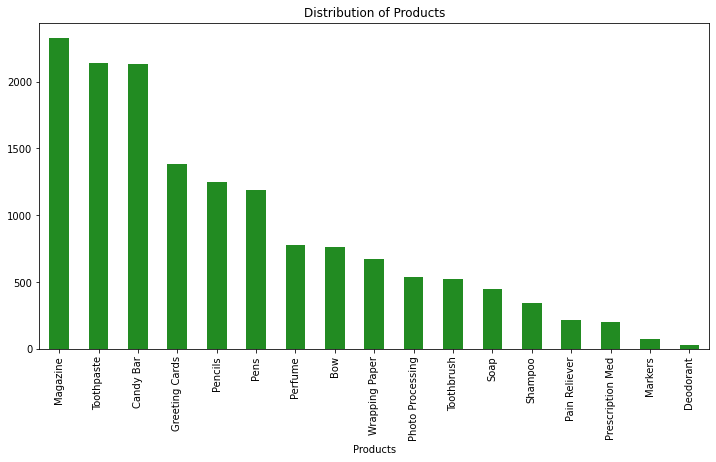

In [175]:
print(df.Product.value_counts())

plt.figure(figsize = (12, 6))
df.Product.value_counts().plot(kind = 'bar', rot = 0, color = ['forestgreen'])
plt.xticks(rotation=90)
plt.title('Distribution of Products')
plt.xlabel('Products')
plt.show()

Magazines is the most popular product

2     1671
4     1566
3     1535
6     1534
9     1469
7     1464
5     1461
10    1437
8     1435
1     1429
Name: Store, dtype: int64


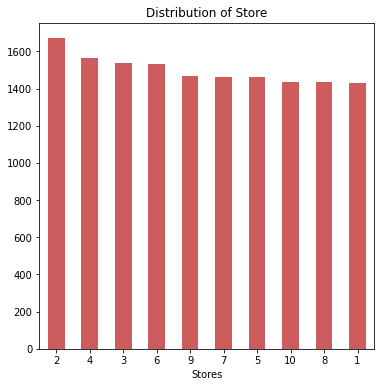

In [176]:
print(df.Store.value_counts())

plt.figure(figsize = (6, 6))
df.Store.value_counts().plot(kind = 'bar', rot = 0, color = ['indianred'])
plt.title('Distribution of Store')
plt.xlabel('Stores')
plt.show()

Store 2 is the most visited store

## <font color='#2F4F4F'>4. Data processing</font>

We group the bread dataframe by Transaction and Item and display the count of items

In [177]:
df.head(2)

,A,Quantity,Transaction,Store,Product
0,30000,2,93194,6,Magazine
1,30001,2,93194,6,Candy Bar


In [178]:
# Step 1: Data processing 
# ---
# Then we consolidate the items into one transaction per row 
# with each item one-hot encoded.
# ---
#
shop_df3 = (df.groupby(['Transaction', 'Product'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction'))

shop_df3.head()

Product,Bow,Candy Bar,Deodorant,Greeting Cards,Magazine,Markers,Pain Reliever,Pencils,Pens,Perfume,Photo Processing,Prescription Med,Shampoo,Soap,Toothbrush,Toothpaste,Wrapping Paper
Transaction,,,,,,,,,,,,,,,,,
93194,0.0,8.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93200,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93206,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0


In [179]:
# We then use our custom encoding function to convert 
# all the values to 0 or 1. 
# The Apriori algorithm will only take 0's or 1's.
# ---
# 
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

shop_df4 = shop_df3.applymap(encode_units)

shop_df4.head()

Product,Bow,Candy Bar,Deodorant,Greeting Cards,Magazine,Markers,Pain Reliever,Pencils,Pens,Perfume,Photo Processing,Prescription Med,Shampoo,Soap,Toothbrush,Toothpaste,Wrapping Paper
Transaction,,,,,,,,,,,,,,,,,
93194,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
93197,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
93200,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
93206,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
93212,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [180]:
# Step 2: We generate the frequent itemsets
shop_frequent_itemsets = apriori(shop_df4, min_support=0.01, use_colnames=True)
shop_frequent_itemsets.sort_values(by=['support'], ascending = False).head()

,support,itemsets
3,0.231936,(Magazine)
1,0.175736,(Candy Bar)
13,0.162504,(Toothpaste)
2,0.152840,(Greeting Cards)
6,0.144068,(Pens)


In [181]:
# Step 3: Finding the association rules
shop_rules = association_rules(shop_frequent_itemsets, metric="lift", min_threshold=1)

# Sorting 
shop_rules.sort_values("confidence", ascending = False, inplace = True)

# Previewing the associative rules
shop_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
44,"(Pencils, Toothpaste)",(Candy Bar),0.022748,0.175736,0.011002,0.483660,2.752198,0.007005,1.596359
22,"(Greeting Cards, Magazine)",(Candy Bar),0.037467,0.175736,0.017247,0.460317,2.619370,0.010662,1.527313
39,"(Toothpaste, Magazine)",(Candy Bar),0.029884,0.175736,0.013232,0.442786,2.519610,0.007981,1.479260
27,"(Toothpaste, Greeting Cards)",(Candy Bar),0.033304,0.175736,0.014570,0.437500,2.489530,0.008718,1.465358
21,"(Candy Bar, Magazine)",(Greeting Cards),0.039994,0.152840,0.017247,0.431227,2.821431,0.011134,1.489452


## <font color='#2F4F4F'>5. Summary of Findings</font>



Support as metric indicates how frequently the itemsets occurs within the dataset 

In [182]:
shop_rules.sort_values(by=['support'], ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Candy Bar),(Greeting Cards),0.175736,0.152840,0.046090,0.262267,1.715963,0.019230,1.148330
3,(Greeting Cards),(Candy Bar),0.152840,0.175736,0.046090,0.301556,1.715963,0.019230,1.180144
7,(Candy Bar),(Toothpaste),0.175736,0.162504,0.041481,0.236041,1.452524,0.012923,1.096258
6,(Toothpaste),(Candy Bar),0.162504,0.175736,0.041481,0.255261,1.452524,0.012923,1.106782
9,(Magazine),(Greeting Cards),0.231936,0.152840,0.037467,0.161538,1.056914,0.002018,1.010375


- This dataset shows that itemset {Candy Bar; Greeting Cards} appears in 4% of transactions in the
whole dataset

Confidence as metric gives us the likelihood of certain items being purchased together. 

In [183]:
shop_rules.sort_values(by=['confidence'], ascending = False).head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
44,"(Pencils, Toothpaste)",(Candy Bar),0.022748,0.175736,0.011002,0.483660,2.752198,0.007005,1.596359
22,"(Greeting Cards, Magazine)",(Candy Bar),0.037467,0.175736,0.017247,0.460317,2.619370,0.010662,1.527313
39,"(Toothpaste, Magazine)",(Candy Bar),0.029884,0.175736,0.013232,0.442786,2.519610,0.007981,1.479260


- The data above shows that there is a 40% confidence that when {Pencils, Toothpaste} is purchased, {Candy Bar} is purchased 



Lift as metric gives us the probability of all of the items in a rule occurring together (otherwise known as the support) divided by the product of the probabilities of the
items on the left and right-hand side occurring as if there was no association between them.

In [184]:
shop_rules.sort_values(by=['lift'], ascending = False).head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(Perfume),(Toothbrush),0.082664,0.067648,0.017098,0.206835,3.057514,0.011506,1.175482
19,(Toothbrush),(Perfume),0.067648,0.082664,0.017098,0.252747,3.057514,0.011506,1.227611
1,(Bow),(Toothbrush),0.051591,0.067648,0.010110,0.195965,2.896843,0.006620,1.159592


- 3.05 indicates a positive relationship between {perfume, toothbrush} hence they occur together more often than randomly and are likely to be purchased together 


## <font color='#2F4F4F'>6. Recommendations</font>

- 4% of transactions contain candy bar and greeting card.
If a customer bought a candy bar, there is a 26% chance
that they will buy a greeting card.Lastly, the value of lift is greater than 1, and it means it is more likely
a candy bar and greeting card will be bought together than each individually hence should be located around the same area to allow for ease of shopping 




In [188]:
shop_rules.sort_values(by= ['support', 'confidence','lift'] , ascending = False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Greeting Cards),(Candy Bar),0.152840,0.175736,0.046090,0.301556,1.715963,0.019230,1.180144
2,(Candy Bar),(Greeting Cards),0.175736,0.152840,0.046090,0.262267,1.715963,0.019230,1.148330
6,(Toothpaste),(Candy Bar),0.162504,0.175736,0.041481,0.255261,1.452524,0.012923,1.106782
7,(Candy Bar),(Toothpaste),0.175736,0.162504,0.041481,0.236041,1.452524,0.012923,1.096258
8,(Greeting Cards),(Magazine),0.152840,0.231936,0.037467,0.245136,1.056914,0.002018,1.017487
9,(Magazine),(Greeting Cards),0.231936,0.152840,0.037467,0.161538,1.056914,0.002018,1.010375
4,(Pencils),(Candy Bar),0.135147,0.175736,0.035088,0.259626,1.477364,0.011337,1.113308
5,(Candy Bar),(Pencils),0.175736,0.135147,0.035088,0.199662,1.477364,0.011337,1.080609
13,(Greeting Cards),(Toothpaste),0.152840,0.162504,0.033304,0.217899,1.340885,0.008467,1.070829
12,(Toothpaste),(Greeting Cards),0.162504,0.152840,0.033304,0.204941,1.340885,0.008467,1.065531


- The retail corporation should use this to search for rules with a lift greater than 1 with high confidence and support values in order pick the above top 10 products that will maximize revenue


## <font color='#2F4F4F'>7. Challenging your Solution</font>

a). Did we have the right data? 
- Yes, we did 

b) Did we have the right question?

- Yes, we did.